## TinyML, 101

In [55]:
# Install TensorFLow
# !pip install tensorflow==2.2.0
#
import tensorflow as tf
#
import numpy as np
#
import matplotlib.pyplot as plt
#
import math
#

In [56]:
print("TensorFlow version", tf.__version__)

TensorFlow version 2.2.0


## Generating sample data

In [57]:
# Generate sample datapoints
SAMPLES = 1000
SEED = 1337

In [58]:
np.random.seed(SEED)
tf.random.set_seed(SEED)

In [59]:
# Generate a uniformly distributed set of random numbers in the range from
# 0 to 2n, wich covers a complete sine wave oscillation
x_values = np.random.uniform(low=0, high=2*math.pi, size=SAMPLES)

In [60]:
# Shuffle the values to garantee they're not in order
np.random.shuffle(x_values)

In [61]:
# Calculate the correspding sine values
y_values = np.sin(x_values)

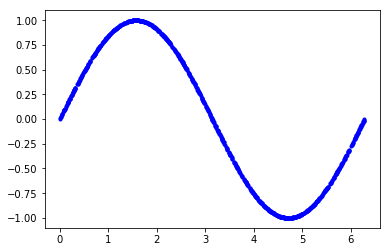

In [62]:
# Plot the data, in blue.
plt.plot(x_values, y_values, 'b.')
plt.show()

In [63]:
# Add small randomness...
y_values += 0.1 * np.random.randn(*y_values.shape)

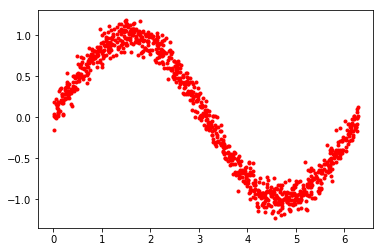

In [64]:
# Re-plot (4-10)
plt.plot(x_values, y_values, 'r.')
plt.show()

In [65]:
TRAIN_SPLIT = int(0.6 * SAMPLES)
TEST_SPLIT = int((0.2 * SAMPLES) + TRAIN_SPLIT)

In [66]:
print(TEST_SPLIT)

800


In [67]:
x_train, x_validate, x_test = np.split(x_values, [TRAIN_SPLIT, TEST_SPLIT])
y_train, y_validate, y_test = np.split(y_values, [TRAIN_SPLIT, TEST_SPLIT])

In [68]:
assert (x_train.size + x_validate.size + x_test.size) == SAMPLES
#
print("Train     : {} element(s)".format(x_train.size))
print("Validation: {} element(s)".format(x_validate.size))
print("Test      : {} element(s)".format(x_test.size))

Train     : 600 element(s)
Validation: 200 element(s)
Test      : 200 element(s)


Plot each data in a different color

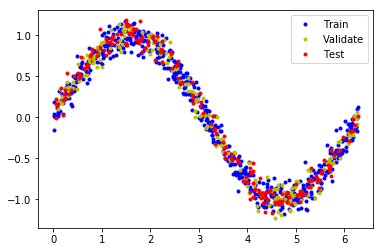

In [69]:
plt.plot(x_train, y_train, 'b.', label="Train")
plt.plot(x_validate, y_validate, 'y.', label="Validate")
plt.plot(x_test, y_test, 'r.', label="Test")
plt.legend()
plt.show()

### Now defining a Basic Model

In [70]:
# Using Keras
# import tensorflow as tf
print("Reminder TF version:", tf.__version__)
#
from tensorflow.keras import layers
# from tensorflow import keras
print("Keras version:", tf.keras.__version__)
# from keras import layers
model_1 = tf.keras.models.Sequential()
#

Reminder TF version: 2.2.0
Keras version: 2.3.0-tf


##### First layer takes a scalar input and feeds it into 16 neurons.
Activation is based on **relu** activation function.

In [71]:
model_1.add(layers.Dense(16, activation='relu', input_shape=(1,)))

Final layer is a single neuron using a standard optimizer and loss function for regression

In [72]:
model_1.add(layers.Dense(1))

In [73]:
# Compile
model_1.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Print model's architecture
model_1.summary()
#

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 17        
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [74]:
history_1 = model_1.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.7994 - mae: 0.7884 - val_loss: 0.5914 - val_mae: 0.6926
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.4854 - mae: 0.6188 - val_loss: 0.4723 - val_mae: 0.6022
Epoch 3/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.4214 - mae: 0.5637 - val_loss: 0.4276 - val_mae: 0.5725
Epoch 4/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.3848 - mae: 0.5383 - val_loss: 0.3897 - val_mae: 0.5418
Epoch 5/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.3516 - mae: 0.5157 - val_loss: 0.3540 - val_mae: 0.5120
Epoch 6/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.3197 - mae: 0.4915 - val_loss: 0.3251 - val_mae: 0.4877
Epoch 7/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.2932 - mae: 0.4701 - val_loss: 0.3007 - val_mae: 0.4722
Epoch 8/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.

38/38 [==============================] - 0s 3ms/step - loss: 0.1630 - mae: 0.3388 - val_loss: 0.1689 - val_mae: 0.3363
Epoch 63/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1634 - mae: 0.3382 - val_loss: 0.1671 - val_mae: 0.3376
Epoch 64/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1643 - mae: 0.3361 - val_loss: 0.1675 - val_mae: 0.3421
Epoch 65/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1636 - mae: 0.3373 - val_loss: 0.1665 - val_mae: 0.3395
Epoch 66/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1636 - mae: 0.3364 - val_loss: 0.1664 - val_mae: 0.3379
Epoch 67/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1643 - mae: 0.3363 - val_loss: 0.1663 - val_mae: 0.3391
Epoch 68/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1645 - mae: 0.3373 - val_loss: 0.1663 - val_mae: 0.3392
Epoch 69/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1632 -

38/38 [==============================] - 0s 3ms/step - loss: 0.1599 - mae: 0.3282 - val_loss: 0.1633 - val_mae: 0.3293
Epoch 124/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1594 - mae: 0.3271 - val_loss: 0.1667 - val_mae: 0.3365
Epoch 125/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1606 - mae: 0.3288 - val_loss: 0.1642 - val_mae: 0.3276
Epoch 126/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1587 - mae: 0.3260 - val_loss: 0.1630 - val_mae: 0.3291
Epoch 127/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1609 - mae: 0.3291 - val_loss: 0.1628 - val_mae: 0.3303
Epoch 128/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1606 - mae: 0.3284 - val_loss: 0.1645 - val_mae: 0.3340
Epoch 129/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1596 - mae: 0.3283 - val_loss: 0.1630 - val_mae: 0.3314
Epoch 130/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 10ms/step - loss: 0.1577 - mae: 0.3238 - val_loss: 0.1624 - val_mae: 0.3227
Epoch 185/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.1583 - mae: 0.3235 - val_loss: 0.1633 - val_mae: 0.3296
Epoch 186/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.1583 - mae: 0.3238 - val_loss: 0.1635 - val_mae: 0.3216
Epoch 187/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.1585 - mae: 0.3214 - val_loss: 0.1624 - val_mae: 0.3217
Epoch 188/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1586 - mae: 0.3228 - val_loss: 0.1616 - val_mae: 0.3268
Epoch 189/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1580 - mae: 0.3219 - val_loss: 0.1612 - val_mae: 0.3259
Epoch 190/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1580 - mae: 0.3228 - val_loss: 0.1616 - val_mae: 0.3221
Epoch 191/1000
38/38 [==============================] - 0s 3ms/step - loss: 

38/38 [==============================] - 0s 3ms/step - loss: 0.1576 - mae: 0.3185 - val_loss: 0.1620 - val_mae: 0.3251
Epoch 246/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1566 - mae: 0.3185 - val_loss: 0.1647 - val_mae: 0.3275
Epoch 247/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1572 - mae: 0.3186 - val_loss: 0.1616 - val_mae: 0.3245
Epoch 248/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1574 - mae: 0.3196 - val_loss: 0.1602 - val_mae: 0.3194
Epoch 249/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1570 - mae: 0.3196 - val_loss: 0.1604 - val_mae: 0.3185
Epoch 250/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1584 - mae: 0.3202 - val_loss: 0.1598 - val_mae: 0.3204
Epoch 251/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1572 - mae: 0.3185 - val_loss: 0.1602 - val_mae: 0.3221
Epoch 252/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.1569 - mae: 0.3160 - val_loss: 0.1595 - val_mae: 0.3159
Epoch 307/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1571 - mae: 0.3160 - val_loss: 0.1593 - val_mae: 0.3189
Epoch 308/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1562 - mae: 0.3155 - val_loss: 0.1619 - val_mae: 0.3228
Epoch 309/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1562 - mae: 0.3144 - val_loss: 0.1613 - val_mae: 0.3221
Epoch 310/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1557 - mae: 0.3161 - val_loss: 0.1617 - val_mae: 0.3142
Epoch 311/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1567 - mae: 0.3167 - val_loss: 0.1610 - val_mae: 0.3215
Epoch 312/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1559 - mae: 0.3159 - val_loss: 0.1611 - val_mae: 0.3217
Epoch 313/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.1558 - mae: 0.3149 - val_loss: 0.1587 - val_mae: 0.3152
Epoch 368/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1556 - mae: 0.3136 - val_loss: 0.1602 - val_mae: 0.3196
Epoch 369/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1547 - mae: 0.3145 - val_loss: 0.1595 - val_mae: 0.3183
Epoch 370/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1557 - mae: 0.3137 - val_loss: 0.1603 - val_mae: 0.3195
Epoch 371/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1553 - mae: 0.3141 - val_loss: 0.1590 - val_mae: 0.3175
Epoch 372/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1562 - mae: 0.3140 - val_loss: 0.1585 - val_mae: 0.3154
Epoch 373/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.1556 - mae: 0.3131 - val_loss: 0.1586 - val_mae: 0.3158
Epoch 374/1000
38/38 [==============================] - 0s 4ms/step - loss: 0

38/38 [==============================] - 0s 4ms/step - loss: 0.1538 - mae: 0.3104 - val_loss: 0.1623 - val_mae: 0.3199
Epoch 429/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1558 - mae: 0.3126 - val_loss: 0.1583 - val_mae: 0.3147
Epoch 430/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1545 - mae: 0.3112 - val_loss: 0.1600 - val_mae: 0.3176
Epoch 431/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1555 - mae: 0.3123 - val_loss: 0.1588 - val_mae: 0.3117
Epoch 432/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3124 - val_loss: 0.1607 - val_mae: 0.3187
Epoch 433/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.1554 - mae: 0.3132 - val_loss: 0.1587 - val_mae: 0.3158
Epoch 434/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1533 - mae: 0.3119 - val_loss: 0.1611 - val_mae: 0.3105
Epoch 435/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1547 - mae: 0.3113 - val_loss: 0.1581 - val_mae: 0.3139
Epoch 490/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1547 - mae: 0.3125 - val_loss: 0.1657 - val_mae: 0.3227
Epoch 491/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1560 - mae: 0.3130 - val_loss: 0.1582 - val_mae: 0.3116
Epoch 492/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1545 - mae: 0.3112 - val_loss: 0.1605 - val_mae: 0.3177
Epoch 493/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1548 - mae: 0.3112 - val_loss: 0.1586 - val_mae: 0.3150
Epoch 494/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1549 - mae: 0.3123 - val_loss: 0.1617 - val_mae: 0.3092
Epoch 495/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1548 - mae: 0.3108 - val_loss: 0.1579 - val_mae: 0.3133
Epoch 496/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.1541 - mae: 0.3076 - val_loss: 0.1593 - val_mae: 0.3153
Epoch 551/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1547 - mae: 0.3103 - val_loss: 0.1578 - val_mae: 0.3103
Epoch 552/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1544 - mae: 0.3106 - val_loss: 0.1584 - val_mae: 0.3139
Epoch 553/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1545 - mae: 0.3097 - val_loss: 0.1669 - val_mae: 0.3225
Epoch 554/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1561 - mae: 0.3108 - val_loss: 0.1578 - val_mae: 0.3108
Epoch 555/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1531 - mae: 0.3066 - val_loss: 0.1587 - val_mae: 0.3144
Epoch 556/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1541 - mae: 0.3097 - val_loss: 0.1617 - val_mae: 0.3081
Epoch 557/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.1531 - mae: 0.3087 - val_loss: 0.1612 - val_mae: 0.3070
Epoch 612/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1549 - mae: 0.3094 - val_loss: 0.1579 - val_mae: 0.3090
Epoch 613/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1551 - mae: 0.3110 - val_loss: 0.1576 - val_mae: 0.3114
Epoch 614/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1529 - mae: 0.3079 - val_loss: 0.1594 - val_mae: 0.3078
Epoch 615/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1554 - mae: 0.3104 - val_loss: 0.1579 - val_mae: 0.3087
Epoch 616/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1536 - mae: 0.3069 - val_loss: 0.1645 - val_mae: 0.3194
Epoch 617/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1540 - mae: 0.3086 - val_loss: 0.1605 - val_mae: 0.3160
Epoch 618/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.1533 - mae: 0.3067 - val_loss: 0.1589 - val_mae: 0.3071
Epoch 673/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1537 - mae: 0.3067 - val_loss: 0.1583 - val_mae: 0.3130
Epoch 674/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1543 - mae: 0.3091 - val_loss: 0.1579 - val_mae: 0.3120
Epoch 675/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1528 - mae: 0.3065 - val_loss: 0.1631 - val_mae: 0.3069
Epoch 676/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1548 - mae: 0.3073 - val_loss: 0.1579 - val_mae: 0.3087
Epoch 677/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1553 - mae: 0.3103 - val_loss: 0.1579 - val_mae: 0.3084
Epoch 678/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1537 - mae: 0.3066 - val_loss: 0.1587 - val_mae: 0.3137
Epoch 679/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.1539 - mae: 0.3067 - val_loss: 0.1590 - val_mae: 0.3139
Epoch 734/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1543 - mae: 0.3085 - val_loss: 0.1595 - val_mae: 0.3144
Epoch 735/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1549 - mae: 0.3084 - val_loss: 0.1576 - val_mae: 0.3112
Epoch 736/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1545 - mae: 0.3096 - val_loss: 0.1575 - val_mae: 0.3101
Epoch 737/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1548 - mae: 0.3092 - val_loss: 0.1585 - val_mae: 0.3133
Epoch 738/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1540 - mae: 0.3086 - val_loss: 0.1600 - val_mae: 0.3151
Epoch 739/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1528 - mae: 0.3061 - val_loss: 0.1586 - val_mae: 0.3133
Epoch 740/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.1539 - mae: 0.3078 - val_loss: 0.1649 - val_mae: 0.3189
Epoch 795/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1546 - mae: 0.3080 - val_loss: 0.1574 - val_mae: 0.3098
Epoch 796/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1546 - mae: 0.3078 - val_loss: 0.1589 - val_mae: 0.3132
Epoch 797/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1540 - mae: 0.3075 - val_loss: 0.1584 - val_mae: 0.3125
Epoch 798/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1524 - mae: 0.3066 - val_loss: 0.1602 - val_mae: 0.3146
Epoch 799/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1548 - mae: 0.3095 - val_loss: 0.1575 - val_mae: 0.3108
Epoch 800/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1538 - mae: 0.3078 - val_loss: 0.1575 - val_mae: 0.3099
Epoch 801/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.1546 - mae: 0.3082 - val_loss: 0.1598 - val_mae: 0.3062
Epoch 856/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1539 - mae: 0.3071 - val_loss: 0.1574 - val_mae: 0.3088
Epoch 857/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1538 - mae: 0.3075 - val_loss: 0.1573 - val_mae: 0.3093
Epoch 858/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1529 - mae: 0.3081 - val_loss: 0.1581 - val_mae: 0.3071
Epoch 859/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1545 - mae: 0.3085 - val_loss: 0.1576 - val_mae: 0.3106
Epoch 860/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1543 - mae: 0.3079 - val_loss: 0.1579 - val_mae: 0.3076
Epoch 861/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1531 - mae: 0.3070 - val_loss: 0.1574 - val_mae: 0.3086
Epoch 862/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.1548 - mae: 0.3091 - val_loss: 0.1574 - val_mae: 0.3085
Epoch 917/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1544 - mae: 0.3081 - val_loss: 0.1574 - val_mae: 0.3086
Epoch 918/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1535 - mae: 0.3070 - val_loss: 0.1655 - val_mae: 0.3192
Epoch 919/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1550 - mae: 0.3079 - val_loss: 0.1664 - val_mae: 0.3196
Epoch 920/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1540 - mae: 0.3073 - val_loss: 0.1577 - val_mae: 0.3109
Epoch 921/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1517 - mae: 0.3038 - val_loss: 0.1574 - val_mae: 0.3090
Epoch 922/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1545 - mae: 0.3073 - val_loss: 0.1574 - val_mae: 0.3095
Epoch 923/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.1540 - mae: 0.3084 - val_loss: 0.1588 - val_mae: 0.3125
Epoch 978/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1528 - mae: 0.3048 - val_loss: 0.1603 - val_mae: 0.3140
Epoch 979/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1537 - mae: 0.3093 - val_loss: 0.1576 - val_mae: 0.3102
Epoch 980/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1542 - mae: 0.3073 - val_loss: 0.1590 - val_mae: 0.3064
Epoch 981/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1537 - mae: 0.3075 - val_loss: 0.1586 - val_mae: 0.3068
Epoch 982/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1538 - mae: 0.3057 - val_loss: 0.1590 - val_mae: 0.3067
Epoch 983/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.1549 - mae: 0.3079 - val_loss: 0.1589 - val_mae: 0.3127
Epoch 984/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

### Graphing the History

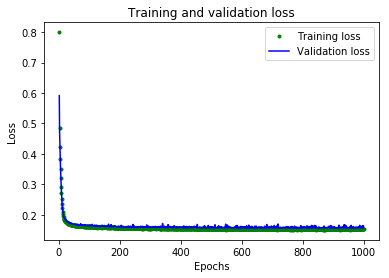

In [75]:
loss = history_1.history['loss']
val_loss = history_1.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Skipping values

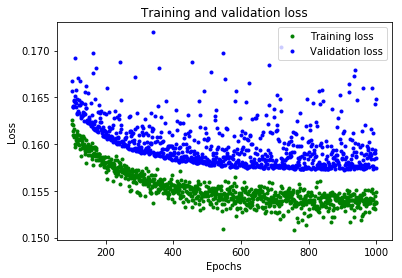

In [76]:
# Exclude the first few epochs to have a graph easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Draw graph for Mean Absolute Error (mae)

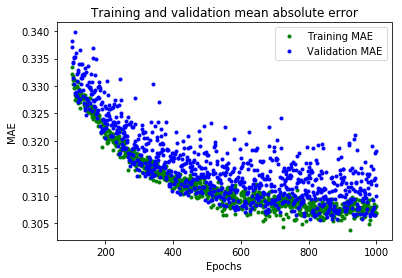

In [77]:
# Another way of measuring the error in the prediction
mae = history_1.history['mae']
val_mae = history_1.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### Apply model: Prediction

In [78]:
# Use the model, predictions from our validation data
predictions = model_1.predict(x_train)

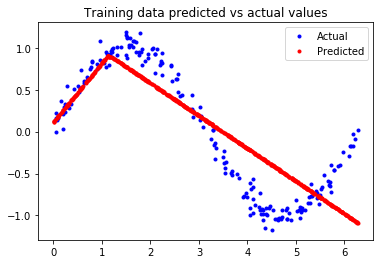

In [79]:
# Plot predictions along with test data
plt.clf()
plt.title('Training data predicted vs actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_train, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

Sounds like the model is not big enough...

Let's add a second layer

In [80]:
model_2 = tf.keras.models.Sequential()
#
model_2.add(layers.Dense(16, activation='relu', input_shape=(1,)))
# A second layer may help the network learn more complex representations
model_2.add(layers.Dense(16, activation='relu'))
# Same last layer
model_2.add(layers.Dense(1))
# Compile
model_2.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
# Print model's architecture
model_2.summary()
#

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_10 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 17        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [81]:
# Train again
history_2 = model_2.fit(x_train, y_train, epochs=1000, batch_size=16, validation_data=(x_validate, y_validate))

Epoch 1/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.7137 - mae: 0.7311 - val_loss: 0.4662 - val_mae: 0.6012
Epoch 2/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.3890 - mae: 0.5420 - val_loss: 0.3745 - val_mae: 0.5205
Epoch 3/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.3183 - mae: 0.4884 - val_loss: 0.3078 - val_mae: 0.4784
Epoch 4/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.2622 - mae: 0.4452 - val_loss: 0.2525 - val_mae: 0.4323
Epoch 5/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.2180 - mae: 0.4095 - val_loss: 0.2074 - val_mae: 0.3926
Epoch 6/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.1853 - mae: 0.3783 - val_loss: 0.1887 - val_mae: 0.3702
Epoch 7/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.1667 - mae: 0.3572 - val_loss: 0.1682 - val_mae: 0.3546
Epoch 8/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.

38/38 [==============================] - 0s 5ms/step - loss: 0.0287 - mae: 0.1275 - val_loss: 0.0336 - val_mae: 0.1286
Epoch 63/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0279 - mae: 0.1284 - val_loss: 0.0300 - val_mae: 0.1263
Epoch 64/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0272 - mae: 0.1233 - val_loss: 0.0332 - val_mae: 0.1426
Epoch 65/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.0263 - mae: 0.1227 - val_loss: 0.0265 - val_mae: 0.1190
Epoch 66/1000
38/38 [==============================] - 0s 8ms/step - loss: 0.0255 - mae: 0.1199 - val_loss: 0.0258 - val_mae: 0.1165
Epoch 67/1000
38/38 [==============================] - 0s 7ms/step - loss: 0.0254 - mae: 0.1197 - val_loss: 0.0264 - val_mae: 0.1191
Epoch 68/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0248 - mae: 0.1182 - val_loss: 0.0255 - val_mae: 0.1219
Epoch 69/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0237 -

38/38 [==============================] - 0s 3ms/step - loss: 0.0128 - mae: 0.0895 - val_loss: 0.0244 - val_mae: 0.1176
Epoch 124/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0130 - mae: 0.0921 - val_loss: 0.0133 - val_mae: 0.0922
Epoch 125/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0133 - mae: 0.0912 - val_loss: 0.0120 - val_mae: 0.0862
Epoch 126/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0126 - mae: 0.0898 - val_loss: 0.0132 - val_mae: 0.0901
Epoch 127/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0125 - mae: 0.0892 - val_loss: 0.0118 - val_mae: 0.0857
Epoch 128/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0123 - mae: 0.0896 - val_loss: 0.0164 - val_mae: 0.1035
Epoch 129/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0130 - mae: 0.0921 - val_loss: 0.0116 - val_mae: 0.0839
Epoch 130/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

Epoch 184/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0127 - mae: 0.0900 - val_loss: 0.0111 - val_mae: 0.0828
Epoch 185/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0123 - mae: 0.0900 - val_loss: 0.0130 - val_mae: 0.0912
Epoch 186/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0119 - mae: 0.0877 - val_loss: 0.0111 - val_mae: 0.0826
Epoch 187/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0122 - mae: 0.0884 - val_loss: 0.0120 - val_mae: 0.0862
Epoch 188/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0122 - mae: 0.0881 - val_loss: 0.0149 - val_mae: 0.0956
Epoch 189/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0121 - mae: 0.0879 - val_loss: 0.0134 - val_mae: 0.0936
Epoch 190/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0121 - mae: 0.0889 - val_loss: 0.0119 - val_mae: 0.0857
Epoch 191/1000
38/38 [==============================] - 0s 3ms

38/38 [==============================] - 0s 2ms/step - loss: 0.0121 - mae: 0.0883 - val_loss: 0.0108 - val_mae: 0.0829
Epoch 246/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0127 - mae: 0.0903 - val_loss: 0.0149 - val_mae: 0.0981
Epoch 247/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0116 - mae: 0.0869 - val_loss: 0.0122 - val_mae: 0.0885
Epoch 248/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0120 - mae: 0.0889 - val_loss: 0.0189 - val_mae: 0.1039
Epoch 249/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0118 - mae: 0.0872 - val_loss: 0.0110 - val_mae: 0.0822
Epoch 250/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0122 - mae: 0.0893 - val_loss: 0.0112 - val_mae: 0.0836
Epoch 251/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0123 - mae: 0.0902 - val_loss: 0.0120 - val_mae: 0.0869
Epoch 252/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0864 - val_loss: 0.0115 - val_mae: 0.0853
Epoch 307/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0123 - mae: 0.0889 - val_loss: 0.0128 - val_mae: 0.0891
Epoch 308/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0120 - mae: 0.0880 - val_loss: 0.0112 - val_mae: 0.0842
Epoch 309/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0119 - mae: 0.0876 - val_loss: 0.0109 - val_mae: 0.0824
Epoch 310/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0872 - val_loss: 0.0121 - val_mae: 0.0881
Epoch 311/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0120 - mae: 0.0880 - val_loss: 0.0118 - val_mae: 0.0868
Epoch 312/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0118 - mae: 0.0866 - val_loss: 0.0137 - val_mae: 0.0949
Epoch 313/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 4ms/step - loss: 0.0121 - mae: 0.0891 - val_loss: 0.0117 - val_mae: 0.0864
Epoch 368/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0118 - mae: 0.0867 - val_loss: 0.0114 - val_mae: 0.0843
Epoch 369/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0118 - mae: 0.0869 - val_loss: 0.0108 - val_mae: 0.0815
Epoch 370/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0116 - mae: 0.0863 - val_loss: 0.0169 - val_mae: 0.1010
Epoch 371/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0120 - mae: 0.0881 - val_loss: 0.0118 - val_mae: 0.0865
Epoch 372/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0118 - mae: 0.0875 - val_loss: 0.0108 - val_mae: 0.0817
Epoch 373/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0119 - mae: 0.0881 - val_loss: 0.0123 - val_mae: 0.0884
Epoch 374/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 4ms/step - loss: 0.0117 - mae: 0.0876 - val_loss: 0.0150 - val_mae: 0.0981
Epoch 429/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0120 - mae: 0.0882 - val_loss: 0.0117 - val_mae: 0.0853
Epoch 430/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0121 - mae: 0.0890 - val_loss: 0.0112 - val_mae: 0.0836
Epoch 431/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0875 - val_loss: 0.0119 - val_mae: 0.0866
Epoch 432/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0119 - mae: 0.0877 - val_loss: 0.0113 - val_mae: 0.0848
Epoch 433/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0118 - mae: 0.0879 - val_loss: 0.0138 - val_mae: 0.0926
Epoch 434/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0121 - mae: 0.0891 - val_loss: 0.0110 - val_mae: 0.0833
Epoch 435/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0874 - val_loss: 0.0129 - val_mae: 0.0899
Epoch 490/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0119 - mae: 0.0885 - val_loss: 0.0106 - val_mae: 0.0805
Epoch 491/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0119 - mae: 0.0882 - val_loss: 0.0125 - val_mae: 0.0888
Epoch 492/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0122 - mae: 0.0893 - val_loss: 0.0116 - val_mae: 0.0856
Epoch 493/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0118 - mae: 0.0871 - val_loss: 0.0119 - val_mae: 0.0863
Epoch 494/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0119 - mae: 0.0889 - val_loss: 0.0155 - val_mae: 0.0959
Epoch 495/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0120 - mae: 0.0885 - val_loss: 0.0123 - val_mae: 0.0880
Epoch 496/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.0114 - mae: 0.0858 - val_loss: 0.0115 - val_mae: 0.0858
Epoch 551/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0113 - mae: 0.0852 - val_loss: 0.0133 - val_mae: 0.0917
Epoch 552/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0117 - mae: 0.0877 - val_loss: 0.0115 - val_mae: 0.0845
Epoch 553/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0118 - mae: 0.0879 - val_loss: 0.0121 - val_mae: 0.0878
Epoch 554/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0118 - mae: 0.0881 - val_loss: 0.0128 - val_mae: 0.0901
Epoch 555/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0116 - mae: 0.0867 - val_loss: 0.0108 - val_mae: 0.0819
Epoch 556/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0120 - mae: 0.0879 - val_loss: 0.0132 - val_mae: 0.0927
Epoch 557/1000
38/38 [==============================] - 0s 5ms/step - loss: 0

Epoch 611/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0116 - mae: 0.0866 - val_loss: 0.0133 - val_mae: 0.0924
Epoch 612/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0120 - mae: 0.0881 - val_loss: 0.0114 - val_mae: 0.0853
Epoch 613/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0114 - mae: 0.0859 - val_loss: 0.0115 - val_mae: 0.0852
Epoch 614/1000
38/38 [==============================] - 0s 9ms/step - loss: 0.0119 - mae: 0.0885 - val_loss: 0.0140 - val_mae: 0.0950
Epoch 615/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0118 - mae: 0.0876 - val_loss: 0.0123 - val_mae: 0.0892
Epoch 616/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0116 - mae: 0.0869 - val_loss: 0.0115 - val_mae: 0.0851
Epoch 617/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0116 - mae: 0.0868 - val_loss: 0.0115 - val_mae: 0.0850
Epoch 618/1000
38/38 [==============================] - 0s 3ms

38/38 [==============================] - 0s 4ms/step - loss: 0.0110 - mae: 0.0843 - val_loss: 0.0119 - val_mae: 0.0864
Epoch 673/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0879 - val_loss: 0.0135 - val_mae: 0.0924
Epoch 674/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0121 - mae: 0.0878 - val_loss: 0.0131 - val_mae: 0.0903
Epoch 675/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0116 - mae: 0.0868 - val_loss: 0.0131 - val_mae: 0.0920
Epoch 676/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0875 - val_loss: 0.0111 - val_mae: 0.0836
Epoch 677/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0118 - mae: 0.0865 - val_loss: 0.0108 - val_mae: 0.0828
Epoch 678/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0116 - mae: 0.0864 - val_loss: 0.0146 - val_mae: 0.0988
Epoch 679/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 2ms/step - loss: 0.0116 - mae: 0.0865 - val_loss: 0.0109 - val_mae: 0.0825
Epoch 734/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0118 - mae: 0.0882 - val_loss: 0.0110 - val_mae: 0.0830
Epoch 735/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0112 - mae: 0.0854 - val_loss: 0.0129 - val_mae: 0.0910
Epoch 736/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0113 - mae: 0.0851 - val_loss: 0.0115 - val_mae: 0.0852
Epoch 737/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0117 - mae: 0.0880 - val_loss: 0.0164 - val_mae: 0.1031
Epoch 738/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0117 - mae: 0.0867 - val_loss: 0.0128 - val_mae: 0.0909
Epoch 739/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0113 - mae: 0.0861 - val_loss: 0.0114 - val_mae: 0.0852
Epoch 740/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.0115 - mae: 0.0868 - val_loss: 0.0131 - val_mae: 0.0913
Epoch 795/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0115 - mae: 0.0861 - val_loss: 0.0117 - val_mae: 0.0854
Epoch 796/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0119 - mae: 0.0879 - val_loss: 0.0115 - val_mae: 0.0850
Epoch 797/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0114 - mae: 0.0858 - val_loss: 0.0107 - val_mae: 0.0817
Epoch 798/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0114 - mae: 0.0858 - val_loss: 0.0159 - val_mae: 0.1012
Epoch 799/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0118 - mae: 0.0879 - val_loss: 0.0123 - val_mae: 0.0882
Epoch 800/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0112 - mae: 0.0854 - val_loss: 0.0109 - val_mae: 0.0823
Epoch 801/1000
38/38 [==============================] - 0s 2ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.0114 - mae: 0.0862 - val_loss: 0.0107 - val_mae: 0.0817
Epoch 856/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0116 - mae: 0.0869 - val_loss: 0.0115 - val_mae: 0.0852
Epoch 857/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0113 - mae: 0.0862 - val_loss: 0.0105 - val_mae: 0.0805
Epoch 858/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0115 - mae: 0.0865 - val_loss: 0.0125 - val_mae: 0.0889
Epoch 859/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0114 - mae: 0.0851 - val_loss: 0.0126 - val_mae: 0.0902
Epoch 860/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0114 - mae: 0.0853 - val_loss: 0.0120 - val_mae: 0.0886
Epoch 861/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0115 - mae: 0.0866 - val_loss: 0.0111 - val_mae: 0.0837
Epoch 862/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 3ms/step - loss: 0.0113 - mae: 0.0860 - val_loss: 0.0122 - val_mae: 0.0889
Epoch 917/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0114 - mae: 0.0864 - val_loss: 0.0111 - val_mae: 0.0839
Epoch 918/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0112 - mae: 0.0849 - val_loss: 0.0168 - val_mae: 0.1020
Epoch 919/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0118 - mae: 0.0864 - val_loss: 0.0109 - val_mae: 0.0823
Epoch 920/1000
38/38 [==============================] - 0s 2ms/step - loss: 0.0118 - mae: 0.0873 - val_loss: 0.0106 - val_mae: 0.0812
Epoch 921/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0116 - mae: 0.0865 - val_loss: 0.0111 - val_mae: 0.0839
Epoch 922/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0112 - mae: 0.0857 - val_loss: 0.0116 - val_mae: 0.0863
Epoch 923/1000
38/38 [==============================] - 0s 3ms/step - loss: 0

38/38 [==============================] - 0s 5ms/step - loss: 0.0114 - mae: 0.0870 - val_loss: 0.0107 - val_mae: 0.0818
Epoch 978/1000
38/38 [==============================] - 0s 9ms/step - loss: 0.0115 - mae: 0.0866 - val_loss: 0.0106 - val_mae: 0.0813
Epoch 979/1000
38/38 [==============================] - 0s 6ms/step - loss: 0.0117 - mae: 0.0872 - val_loss: 0.0112 - val_mae: 0.0849
Epoch 980/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0113 - mae: 0.0862 - val_loss: 0.0141 - val_mae: 0.0977
Epoch 981/1000
38/38 [==============================] - 0s 3ms/step - loss: 0.0114 - mae: 0.0863 - val_loss: 0.0147 - val_mae: 0.0995
Epoch 982/1000
38/38 [==============================] - 0s 5ms/step - loss: 0.0115 - mae: 0.0873 - val_loss: 0.0106 - val_mae: 0.0810
Epoch 983/1000
38/38 [==============================] - 0s 4ms/step - loss: 0.0113 - mae: 0.0856 - val_loss: 0.0113 - val_mae: 0.0846
Epoch 984/1000
38/38 [==============================] - 0s 5ms/step - loss: 0

## Plot the data, see if there is any change

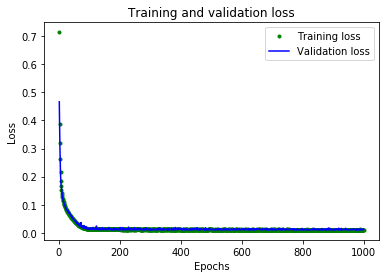

In [82]:
loss = history_2.history['loss']
val_loss = history_2.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'g.', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


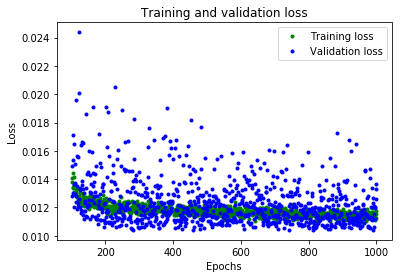

In [83]:
# Exclude the first few epochs to have a graph easier to read
SKIP = 100

plt.plot(epochs[SKIP:], loss[SKIP:], 'g.', label='Training loss')
plt.plot(epochs[SKIP:], val_loss[SKIP:], 'b.', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

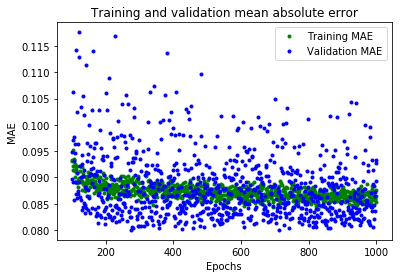

In [84]:
# Another way of measuring the error in the prediction
mae = history_2.history['mae']
val_mae = history_2.history['val_mae']

plt.plot(epochs[SKIP:], mae[SKIP:], 'g.', label='Training MAE')
plt.plot(epochs[SKIP:], val_mae[SKIP:], 'b.', label='Validation MAE')
plt.title('Training and validation mean absolute error')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

### Now re-testing

7/7 [==============================] - 0s 5ms/step - loss: 0.0096 - mae: 0.0777


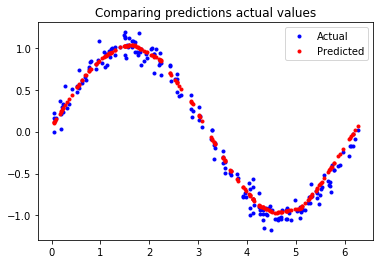

In [85]:
loss = model_2.evaluate(x_test, y_test)
# Use the model, predictions from our test dataset
predictions = model_2.predict(x_test)

# Plot predictions along with test data
plt.clf()
plt.title('Comparing predictions actual values')
plt.plot(x_test, y_test, 'b.', label='Actual')
plt.plot(x_test, predictions, 'r.', label='Predicted')
plt.legend()
plt.show()

Much better!

## Converting for TensorFlow Lite, and storing the model

In [86]:
# Convert the model to TensorFlow Lite format - without quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
tflite_model = converter.convert()

# Save to disk
open("sine_model.tflite", "wb").write(tflite_model)


2724

In [87]:
# Convert the model to TensorFlow Lite format - with quantization
converter = tf.lite.TFLiteConverter.from_keras_model(model_2)
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# define generator function
def representative_dataset_generator():
  for value in x_test:
    # Each scalar value must be inside a 2D arraythat is wrapped in the list
    yield [np.array(value, dtype=np.float32, ndmin=2)]

converter.representative_dataset = representative_dataset_generator
# Conversion here
tflite_model = converter.convert()

# And finally save to disk
open("sine_model_quantized.tflite", "wb").write(tflite_model)


2736

### Predict from the store models

In [88]:
# Instantiate an interpreter for each model
sine_model = tf.lite.Interpreter('sine_model.tflite')
sine_model_quantized = tf.lite.Interpreter('sine_model_quantized.tflite')

# Allocate required memory
sine_model.allocate_tensors()
sine_model_quantized.allocate_tensors()

# Get indexes of input nd output tensors
sine_model_input_index = sine_model.get_input_details()[0]["index"]
sine_model_output_index = sine_model.get_output_details()[0]["index"]
#
sine_model_quantized_input_index = sine_model_quantized.get_input_details()[0]["index"]
sine_model_quantized_output_index = sine_model_quantized.get_output_details()[0]["index"]

# Create array to store results
sine_model_predictions = []
sine_model_quantized_predictions = []

# Run each interpreter for each test value and store it in their dedicated array
for x_value in x_test:
  # Create 2D sensor wrapping the current x value
  x_value_tensor = tf.convert_to_tensor([[x_value]], dtype=np.float32)
  # Write value to input tensor
  sine_model.set_tensor(sine_model_input_index, x_value_tensor)
  # Run inference
  sine_model.invoke()
  # Read output, and store it
  sine_model_predictions.append(sine_model.get_tensor(sine_model_output_index)[0])
  # Same for the other model
  sine_model_quantized.set_tensor(sine_model_quantized_input_index, x_value_tensor)
  sine_model_quantized.invoke()
  sine_model_quantized_predictions.append(sine_model_quantized.get_tensor(sine_model_quantized_output_index)[0])


#### Plot results for the 2 models

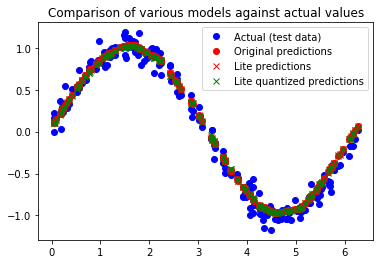

In [89]:
plt.clf()
plt.title('Comparison of various models against actual values')
plt.plot(x_test, y_test, 'bo', label='Actual (test data)')
plt.plot(x_test, predictions, 'ro', label='Original predictions')
plt.plot(x_test, sine_model_predictions, 'rx', label='Lite predictions')
plt.plot(x_test, sine_model_quantized_predictions, 'gx', label='Lite quantized predictions')
#
plt.legend()
plt.show()

#### Model size comparison

In [90]:
import os

basic_model_size = os.path.getsize("sine_model.tflite")
print("Basic model is %d bytes big" % basic_model_size)

quantized_model_size = os.path.getsize("sine_model_quantized.tflite")
print("Quantized model is %d bytes big" % quantized_model_size)

difference = basic_model_size - quantized_model_size
print("Difference is %d bytes" % difference)


Basic model is 2724 bytes big
Quantized model is 2736 bytes big
Difference is -12 bytes


### Converting to a C file

In [91]:
# Install xxd if not there yet (should be there on a Mac, comment the line)
# !apt-get -qq install xxd
# Save the file (the model) as a C file
!xxd -i sine_model_quantized.tflite > sine_model_quantized.cc
# Display the file's content
!cat sine_model_quantized.cc


unsigned char sine_model_quantized_tflite[] = {
  0x20, 0x00, 0x00, 0x00, 0x54, 0x46, 0x4c, 0x33, 0x00, 0x00, 0x00, 0x00,
  0x00, 0x00, 0x12, 0x00, 0x1c, 0x00, 0x04, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x10, 0x00, 0x14, 0x00, 0x00, 0x00, 0x18, 0x00, 0x12, 0x00, 0x00, 0x00,
  0x03, 0x00, 0x00, 0x00, 0x3c, 0x0a, 0x00, 0x00, 0x14, 0x03, 0x00, 0x00,
  0xfc, 0x02, 0x00, 0x00, 0x3c, 0x00, 0x00, 0x00, 0x04, 0x00, 0x00, 0x00,
  0x01, 0x00, 0x00, 0x00, 0x0c, 0x00, 0x00, 0x00, 0x08, 0x00, 0x0c, 0x00,
  0x04, 0x00, 0x08, 0x00, 0x08, 0x00, 0x00, 0x00, 0x08, 0x00, 0x00, 0x00,
  0x0b, 0x00, 0x00, 0x00, 0x13, 0x00, 0x00, 0x00, 0x6d, 0x69, 0x6e, 0x5f,
  0x72, 0x75, 0x6e, 0x74, 0x69, 0x6d, 0x65, 0x5f, 0x76, 0x65, 0x72, 0x73,
  0x69, 0x6f, 0x6e, 0x00, 0x0c, 0x00, 0x00, 0x00, 0xa8, 0x02, 0x00, 0x00,
  0x94, 0x02, 0x00, 0x00, 0x38, 0x02, 0x00, 0x00, 0x14, 0x02, 0x00, 0x00,
  0xc0, 0x01, 0x00, 0x00, 0x9c, 0x01, 0x00, 0x00, 0x88, 0x00, 0x00, 0x00,
  0x64, 0x00, 0x00, 0x00, 0x58, 0x00, 0x00, 0x00, 0x44, 0x00, 0x